In [1]:
### Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
import json
import pprint as pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding coordinates, city, and country
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))

520
520


In [5]:

url = 'http://api.openweathermap.org/data/2.5/weather?'
#set units to pull data
units = 'imperial'

#build partial query url
query_url = f'{url}appid={weather_api_key}&units={units}&q='

In [6]:
#set up lists to hold response info
name = []
id = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

#loop through the list of cities and perform a request for data on each
for city in cities:
    try:    
        response = requests.get(query_url + city).json()
        name.append(response['name'])
        id.append(response['id'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    except:
        continue
        
#print the length of each to to ensure they all have the same number of values
print(len(name))
print(len(id))
print(len(lat))
print(len(lng))
print(len(temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))

481
481
481
481
481
481
481
481


In [7]:
#create dataframe from the data pulled above
weather_dict = {
    'city': name,
    'id': id,
    'lat': lat,
    'lng': lng,
    'temp': temp,
    'humidity': humidity,
    'clouds': cloudiness,
    'wind_speed': wind_speed
}    
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,id,lat,lng,temp,humidity,clouds,wind_speed
0,Tucurui,3385935,-3.77,-49.67,75.96,94,99,5.35
1,Cape Town,3369157,-33.93,18.42,66.20,59,0,8.05
2,Napasar,1261882,27.97,73.55,53.17,55,9,6.85
3,Saquarema,3448011,-22.92,-42.51,78.13,78,20,6.93
4,Puerto Ayora,3652764,-0.74,-90.35,79.72,65,40,8.05


In [8]:
#pull individual column data for scatter plots
lat_values = weather_data['lat']
temp_values = weather_data['temp']
humidity_values = weather_data['humidity']
clouds_values = weather_data['clouds']
wind_speed_values = weather_data['wind_speed']

# Scatter Plots

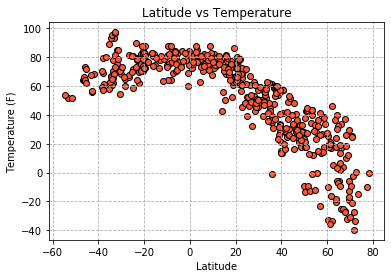

In [10]:
#latitude vs temperature
plt.scatter(lat_values, temp_values, marker='o', facecolors='#ff5733', edgecolors='black')
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True, linestyle='--')
plt.savefig('output_data/lat_temp_plt.png')

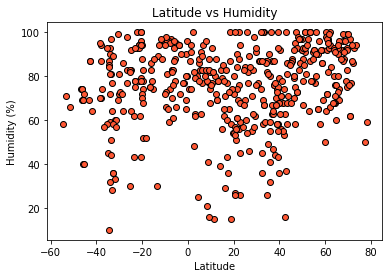

In [11]:
#latitude vs humidity
plt.scatter(lat_values, humidity_values, marker='o', facecolors='#ff5733', edgecolors='black')
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/lat_hum_plt.png')

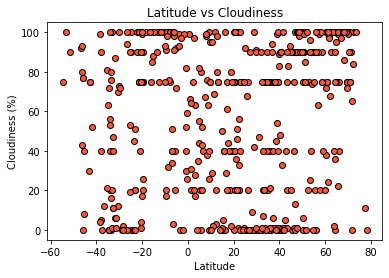

In [12]:
#latitude vs cloudiness
plt.scatter(lat_values, clouds_values, marker='o', facecolors='#ff5733', edgecolors='black')
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/lat_cloud_plt.png')

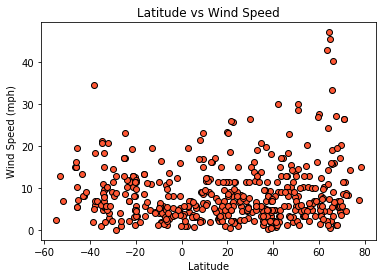

In [13]:
#latitude vs wind speed
plt.scatter(lat_values, wind_speed_values, marker='o', facecolors='#ff5733', edgecolors='black')
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/lat_wind_plt.png')

# Hemisphere Scatter Plots

In [14]:
#locate the data with a latitude value equal to or greater than 0 for northern hemisphere
north_hem = weather_data.loc[weather_data['lat'] >= 0]
#locate the data with a latitude value less than 0 for southern hemisphere
south_hem = weather_data.loc[weather_data['lat'] < 0]

In [15]:
#pull individual column data for scatter plots based on hemisphere
north_temp = north_hem['temp']
south_temp = south_hem['temp']
north_lat = north_hem['lat']
south_lat = south_hem['lat']
north_humid = north_hem['humidity']
south_humid = south_hem['humidity']
north_clouds = north_hem['clouds']
south_clouds = south_hem['clouds']
north_wind = north_hem['wind_speed']
south_wind = south_hem['wind_speed']

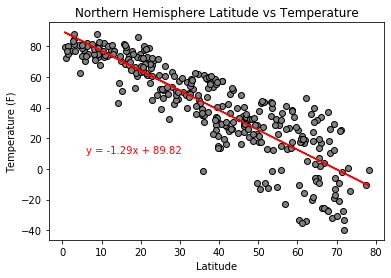

In [34]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_temp, marker='o', facecolors='grey', edgecolors='black')
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(6,10), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('output_data/01_north_lat_temp.png')

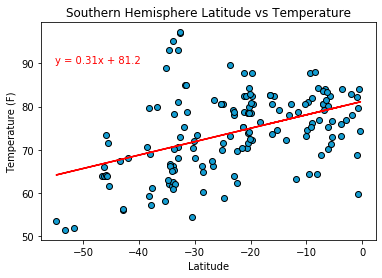

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_temp, marker='o', facecolors='#139dd2', edgecolors='black')
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(-55,90), fontsize=10, color='red')
plt.title('Southern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('output_data/01_south_lat_temp.png')

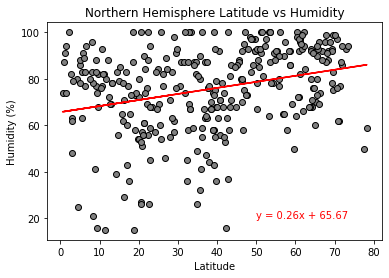

In [47]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_humid, marker='o', facecolors='grey', edgecolors='black')
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(50,20), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/02_north_lat_humid.png')

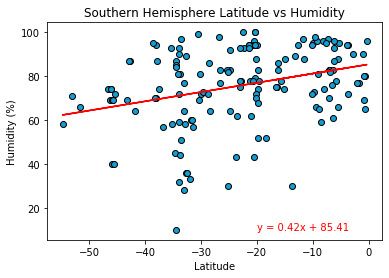

In [52]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_humid, marker='o', facecolors='#139dd2', edgecolors='black')
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(-20,10), fontsize=10, color='red')
plt.title('Southern Hemisphere Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/02_south_lat_humid.png')

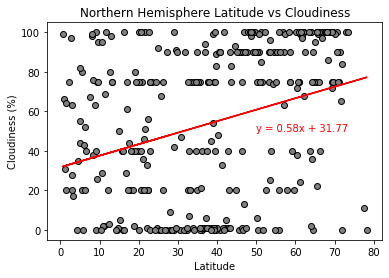

In [53]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_clouds)
regress_values = north_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(north_lat, north_clouds, marker='o', facecolors='grey', edgecolors='black')
plt.plot(north_lat, regress_values, 'r-')
plt.annotate(line_eq,(50,50), fontsize=10, color='red')
plt.title('Northern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/03_north_lat_cloud.png')

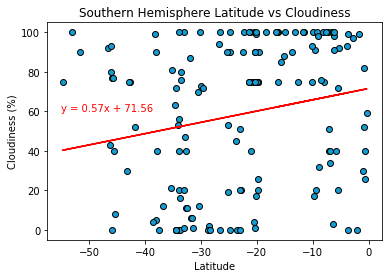

In [54]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_clouds)
regress_values = south_lat * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(south_lat, south_clouds, marker='o', facecolors='#139dd2', edgecolors='black')
plt.plot(south_lat, regress_values, 'r-')
plt.annotate(line_eq,(-55,60), fontsize=10, color='red')
plt.title('Southern Hemisphere Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/03_south_lat_cloud.png')

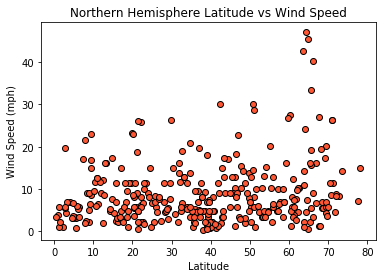

In [22]:
plt.scatter(north_lat, north_wind, marker='o', facecolors='#ff5733', edgecolors='black')
plt.title('Northern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/04_north_lat_wind.png')

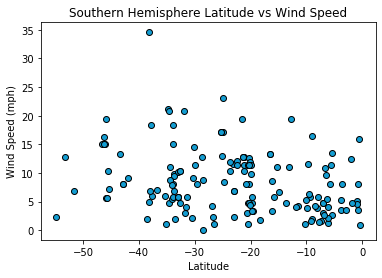

In [23]:
plt.scatter(south_lat, south_wind, marker='o', facecolors='#139dd2', edgecolors='black')
plt.title('Southern Hemisphere Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/04_south_lat_wind.png')